# Imports

In [1]:
import re

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Config
sns.set_theme(style="darkgrid")
sns.set()

# Open file

In [2]:
df = pd.read_csv("../data/clear_data.csv")

In [3]:
df.head()

,title,city,country_code,marker_icon,workplace_type,company_name,company_size,experience_level,latitude,longitude,published_at,remote_interview,remote,num_technology,contract_type,salary_min,salary_max,currency,technology,levels
0,Java Developer,Warszawa,PL,java,partly_remote,SoftwarePlant,150+,mid,52.194550,20.932105,2021-03-23T18:00:06.572Z,True,False,3,mandate_contract,11000.0,20000.0,pln,"['Clean Code', 'Spring', 'Java']","[4, 4, 4]"
1,DevOps,Warszawa,PL,devops,remote,Britenet,500+,mid,52.234030,20.977031,2021-03-23T18:00:06.572Z,True,True,3,b2b,14000.0,18000.0,pln,"['JBoss', 'Apache Tomcat', 'Jenkins']","[4, 4, 5]"
2,UX Designer,Poznań,PL,ux,remote,DietLabs,40-50,mid,52.403434,16.901688,2021-03-23T18:00:06.572Z,True,True,1,b2b,8000.0,12000.0,pln,['UX'],[3]
3,Senior DevOps Engineer - NSP/NMK Team,Gdańsk,PL,devops,office,Nike PCC,"10,000+",senior,54.371140,18.627930,2021-03-23T18:00:06.572Z,True,False,3,permanent,NaN,NaN,NaN,"['Kubernetes', 'AWS', 'CI/CD']","[4, 4, 5]"
4,Data Scientist,Wrocław,PL,data,partly_remote,ManpowerGroup,4000,mid,51.107885,17.038538,2021-03-23T18:00:06.572Z,True,False,3,b2b,11760.0,16800.0,pln,"['Agile', 'English', 'R']","[3, 4, 5]"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3930 entries, 0 to 3929
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             3930 non-null   object 
 1   city              3930 non-null   object 
 2   country_code      3930 non-null   object 
 3   marker_icon       3930 non-null   object 
 4   workplace_type    3930 non-null   object 
 5   company_name      3930 non-null   object 
 6   company_size      3930 non-null   object 
 7   experience_level  3930 non-null   object 
 8   latitude          3930 non-null   float64
 9   longitude         3930 non-null   float64
 10  published_at      3930 non-null   object 
 11  remote_interview  3930 non-null   bool   
 12  remote            3930 non-null   bool   
 13  num_technology    3930 non-null   int64  
 14  contract_type     3930 non-null   object 
 15  salary_min        3046 non-null   float64
 16  salary_max        3046 non-null   float64


# Salary Target

In [5]:
df['salary_min'].isna().sum()
df = df.dropna()

# City

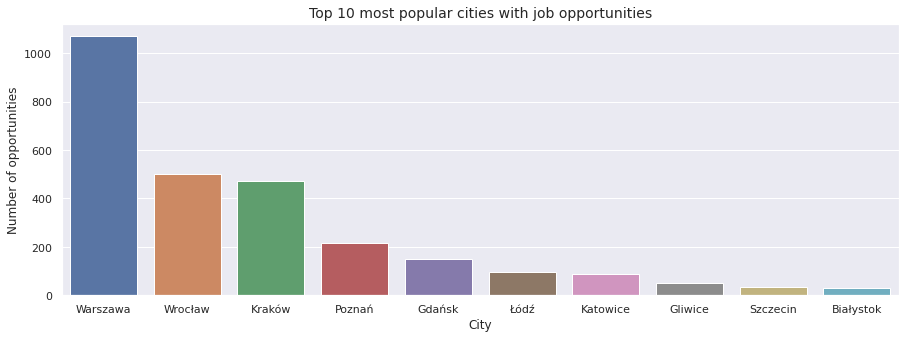

In [6]:
# Get first ten cities from column 'city'
city = df['city'].value_counts()[:10]

# Plotting a bar graph
plt.figure(figsize=(15,5))
sns.barplot(x=city.index, y=city.values)

# Simple config
plt.title("Top 10 most popular cities with job opportunities", fontsize=14)
plt.ylabel("Number of opportunities")
plt.xlabel("City")
plt.show()

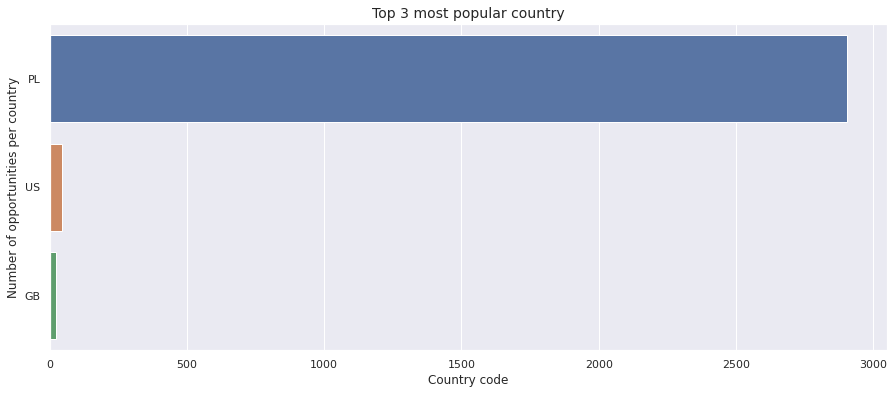

In [7]:
countries = df['country_code'].value_counts()[:3]


# Plotting a bar graph
plt.figure(figsize=(15,6))
sns.barplot(y=countries.index, x=countries.values, orient="h")

# Simple config
plt.title("Top 3 most popular country", fontsize=14)
plt.ylabel("Number of opportunities per country")
plt.xlabel("Country code")
plt.show()

In [8]:
df = df.loc[df['country_code'] == "PL"]

# Technologies

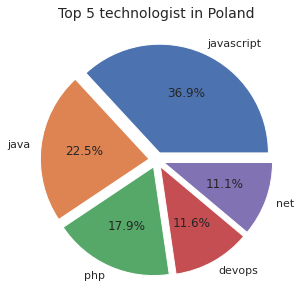

In [9]:
technologies = df['marker_icon'].value_counts()[:5]

plt.figure(figsize=(10,5))
plt.pie(x=technologies.values, labels=technologies.index, explode=[0.07]*5, autopct="%.1f%%")
plt.title("Top 5 technologist in Poland", fontsize=14)
plt.show()

In [10]:
df.head(1)

,title,city,country_code,marker_icon,workplace_type,company_name,company_size,experience_level,latitude,longitude,published_at,remote_interview,remote,num_technology,contract_type,salary_min,salary_max,currency,technology,levels
0,Java Developer,Warszawa,PL,java,partly_remote,SoftwarePlant,150+,mid,52.19455,20.932105,2021-03-23T18:00:06.572Z,True,False,3,mandate_contract,11000.0,20000.0,pln,"['Clean Code', 'Spring', 'Java']","[4, 4, 4]"


In [11]:
skills = []
import ast

def get_skill(x):
    x = ast.literal_eval(x)
    for num_skills in range(len(x)):
        try:
            skills.append(x[num_skills])
        except:
            continue
    return skills

df['technology'].apply(lambda x: get_skill(x))

0       [Clean Code, Spring, Java, JBoss, Apache Tomca...
1       [Clean Code, Spring, Java, JBoss, Apache Tomca...
2       [Clean Code, Spring, Java, JBoss, Apache Tomca...
4       [Clean Code, Spring, Java, JBoss, Apache Tomca...
5       [Clean Code, Spring, Java, JBoss, Apache Tomca...
                              ...                        
3924    [Clean Code, Spring, Java, JBoss, Apache Tomca...
3925    [Clean Code, Spring, Java, JBoss, Apache Tomca...
3926    [Clean Code, Spring, Java, JBoss, Apache Tomca...
3927    [Clean Code, Spring, Java, JBoss, Apache Tomca...
3928    [Clean Code, Spring, Java, JBoss, Apache Tomca...
Name: technology, Length: 2904, dtype: object

In [12]:
unique_skills = set(skills)
print(len(unique_skills))

1105


In [13]:
df['total_skills'] = df['levels'].apply(lambda x: len(ast.literal_eval(x)))

# Workplace vs. COVID-19

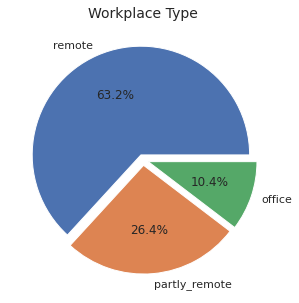

In [14]:
df_workplace = df['workplace_type'].value_counts()

plt.figure(figsize=(10,5))
plt.pie(x=df_workplace.values, labels=df_workplace.index, explode=[0.05]*3, autopct="%.1f%%")
plt.title("Workplace Type", fontsize=14)
plt.show()

# Company size

In [15]:
df['company_size']

0        150+
1        500+
2       40-50
4        4000
5        200+
        ...  
3924    20-30
3925    10-15
3926      10+
3927     5-10
3928       10
Name: company_size, Length: 2904, dtype: object

In [16]:
def clear_data(x):
    x = x.split('-')[0]
    x = re.sub('[-+<>,.]', '', x)
    x = x.replace(' ', '')
    if x == '':
        x = x.replace('', '0')
    x = int(x)
    return x

In [17]:
df['company_size'] = df['company_size'].apply(lambda x: clear_data(x))

In [18]:
df['company_size_bin'] = pd.cut(df['company_size'],
                                bins=[0,30,500,1000,100000],
                                labels=["very_small", "small","medium", 'large'])

# Experience Level

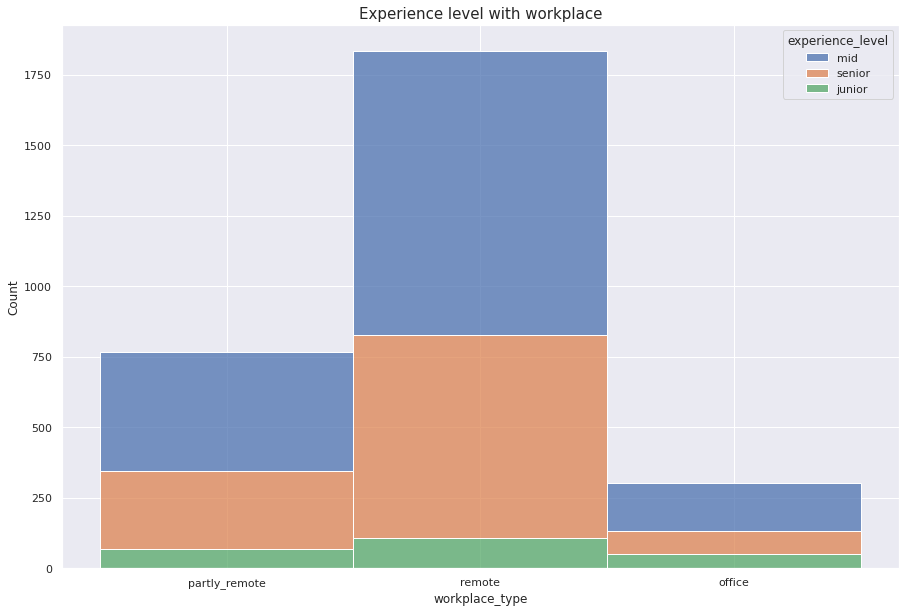

In [19]:
plt.figure(figsize=(15,10))

sns.histplot(
    df,
    x="workplace_type", hue="experience_level",
    multiple="stack",
);

plt.title("Experience level with workplace", fontsize=15.0);

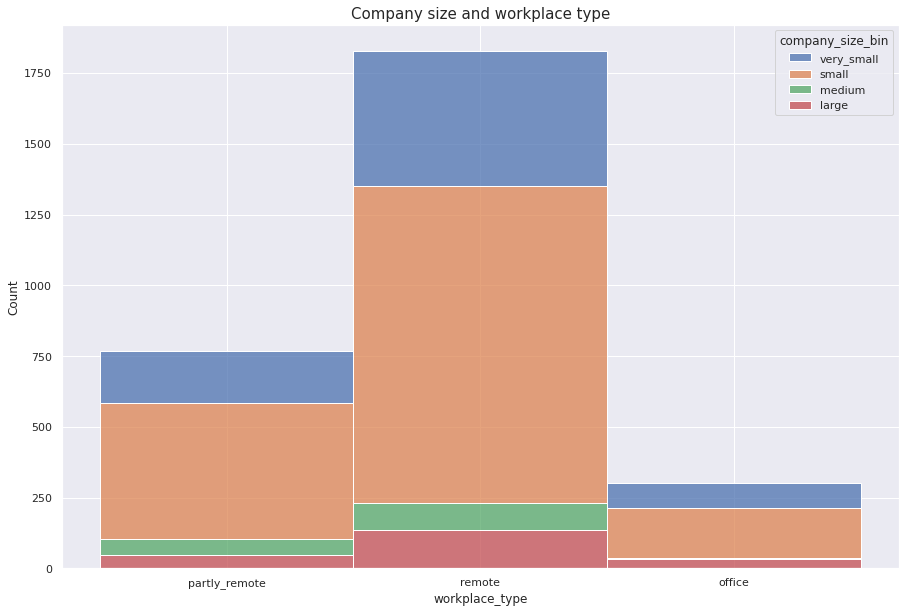

In [20]:
plt.figure(figsize=(15,10))

sns.histplot(
    df,
    x="workplace_type", hue="company_size_bin",
    multiple="stack",
);

plt.title("Company size and workplace type", fontsize=15.0);

# Salary

In [21]:
df['salary_mean'] = df[['salary_min', 'salary_max']].mean(axis=1)

### Convert to EUR, USD to PLN

In [22]:
df['currency'].value_counts()

pln    2872
eur      17
usd      13
gbp       2
Name: currency, dtype: int64

In [23]:
currency = {"usd": 3.70,
            "eur": 4.50,
            "gbp": 5.21,
            "chf": 4.12,
            "pln" : 1.0
           }

In [24]:
df = df.replace({"currency": currency})

In [25]:
df['salary_mean'] = df['salary_mean'] * df['currency']

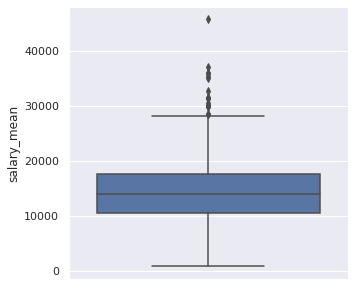

In [26]:
plt.figure(figsize=(5,5))
sns.boxplot(y=df['salary_mean']);

In [27]:
df['salary_mean'].describe()

count     2904.000000
mean     14204.611040
std       5148.756318
min        875.000000
25%      10500.000000
50%      14000.000000
75%      17610.000000
max      45702.000000
Name: salary_mean, dtype: float64

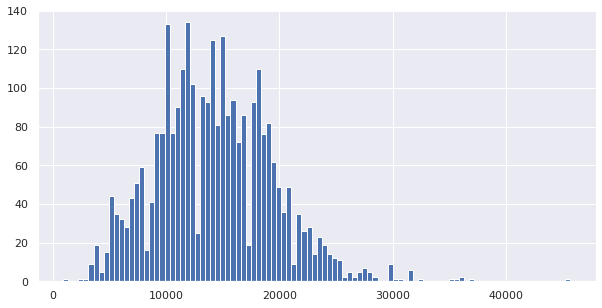

In [28]:
plt.figure(figsize=(10,5))
df['salary_mean'].hist(bins=100);

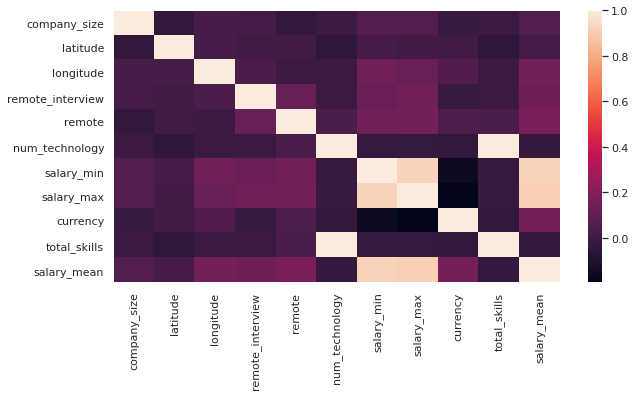

In [29]:
plt.figure(figsize=(10,5))
df_corr = df.corr()
sns.heatmap(data=df_corr);

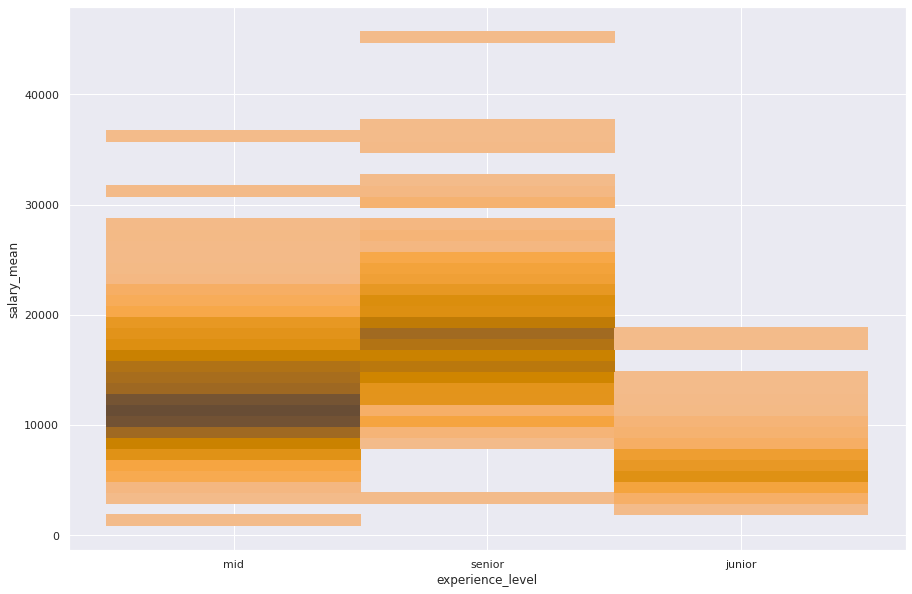

In [30]:
plt.figure(figsize=(15,10))
sns.histplot(data=df, x='experience_level', y='salary_mean', color="orange");

# Create numerical data

In [31]:
df.head()

,title,city,country_code,marker_icon,workplace_type,company_name,company_size,experience_level,latitude,longitude,...,num_technology,contract_type,salary_min,salary_max,currency,technology,levels,total_skills,company_size_bin,salary_mean
0,Java Developer,Warszawa,PL,java,partly_remote,SoftwarePlant,150,mid,52.194550,20.932105,...,3,mandate_contract,11000.0,20000.0,1.0,"['Clean Code', 'Spring', 'Java']","[4, 4, 4]",3,small,15500.0
1,DevOps,Warszawa,PL,devops,remote,Britenet,500,mid,52.234030,20.977031,...,3,b2b,14000.0,18000.0,1.0,"['JBoss', 'Apache Tomcat', 'Jenkins']","[4, 4, 5]",3,small,16000.0
2,UX Designer,Poznań,PL,ux,remote,DietLabs,40,mid,52.403434,16.901688,...,1,b2b,8000.0,12000.0,1.0,['UX'],[3],1,small,10000.0
4,Data Scientist,Wrocław,PL,data,partly_remote,ManpowerGroup,4000,mid,51.107885,17.038538,...,3,b2b,11760.0,16800.0,1.0,"['Agile', 'English', 'R']","[3, 4, 5]",3,large,14280.0
5,Senior/Lead Devops,Warszawa,PL,devops,partly_remote,Bonnier Business,200,senior,52.250215,21.043064,...,3,b2b,12000.0,20000.0,1.0,"['MySQL / PostgreSQL', 'virtualization and con...","[3, 3, 4]",3,small,16000.0


In [32]:
# Remove columns

columns_to_drop = ['company_name', 
           'company_size',
           'salary_min',
           'salary_max',
           'currency',
           'published_at',
           'longitude',
           'latitude', 
           'remote_interview', 
           'remote',
           'technology',
           'levels', 
           'title',
           'country_code',
           'num_technology', 'total_skills']

df = df.drop(columns_to_drop, axis=1)

In [33]:
df.head()

,city,marker_icon,workplace_type,experience_level,contract_type,company_size_bin,salary_mean
0,Warszawa,java,partly_remote,mid,mandate_contract,small,15500.0
1,Warszawa,devops,remote,mid,b2b,small,16000.0
2,Poznań,ux,remote,mid,b2b,small,10000.0
4,Wrocław,data,partly_remote,mid,b2b,large,14280.0
5,Warszawa,devops,partly_remote,senior,b2b,small,16000.0


In [34]:
df.to_csv("../data/clear_output_data.csv", index=False)

In [35]:
df = pd.read_csv('../data/clear_output_data.csv')

In [36]:
df['city'] = df['city'].astype('category')
df['city'] = df['city'].cat.codes

df['marker_icon'] = df['marker_icon'].astype('category')
df['marker_icon'] = df['marker_icon'].cat.codes

df = pd.get_dummies(df, columns=['workplace_type', 'experience_level', 'contract_type', 'company_size_bin'], prefix="feature")

In [37]:
df.head()

,city,marker_icon,salary_mean,feature_office,feature_partly_remote,feature_remote,feature_junior,feature_mid,feature_senior,feature_b2b,feature_mandate_contract,feature_permanent,feature_large,feature_medium,feature_small,feature_very_small
0,34,7,15500.0,0,1,0,0,1,0,0,1,0,0,0,1,0
1,34,3,16000.0,0,0,1,0,1,0,1,0,0,0,0,1,0
2,19,21,10000.0,0,0,1,0,1,0,1,0,0,0,0,1,0
3,35,2,14280.0,0,1,0,0,1,0,1,0,0,1,0,0,0
4,34,3,16000.0,0,1,0,0,0,1,1,0,0,0,0,1,0


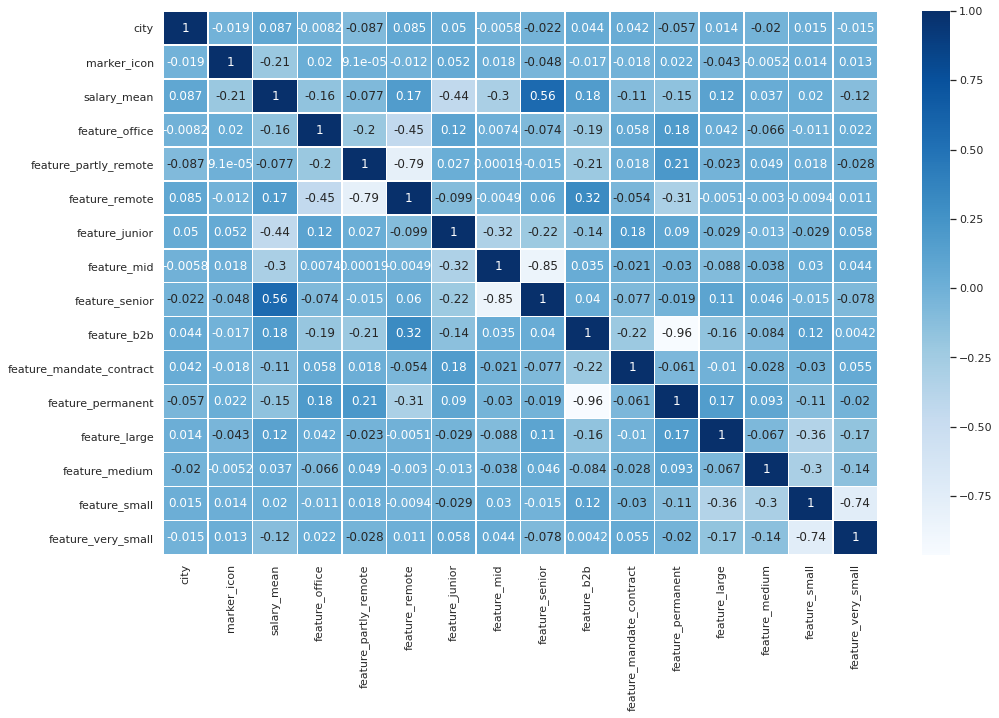

In [38]:
plt.figure(figsize=(16,10))
correlation = df.corr()
sns.heatmap(correlation, annot=True, linewidths=0.5, cmap="Blues");

In [39]:
df.to_csv("../data/numerical_df", index=False)